In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from info_apoio import best_corr
from info_apoio import drop_outlier

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import RandomizedSearchCV


# Leitura e união dos dados:

In [2]:
base_object = pd.read_csv("data_object.csv")
base_number = pd.read_csv("data_number.csv")

base = pd.merge(base_object, base_number, on='NU_INSCRICAO')
base.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,...,IN_DEFICIENCIA_MENTAL,CO_MUNICIPIO_PROVA,TP_NACIONALIDADE,TP_ESTADO_CIVIL,Q005,NU_INSCRICAO.1,NU_IDADE,TP_COR_RACA,TP_LINGUA,TP_STATUS_REDACAO
0,190001237802,0,0,0,0,0,0,0,0,0,...,0,3118601,1,1,3,190001237802,22.0,1,0,1.0
1,190001237803,0,0,0,0,0,0,0,0,0,...,0,3170206,1,1,4,190001237803,30.0,2,1,NaN
2,190001237804,0,0,0,0,0,0,0,0,0,...,0,3124104,2,1,2,190001237804,27.0,3,0,1.0
3,190001237805,0,0,0,0,0,0,0,0,0,...,0,3118304,1,1,4,190001237805,22.0,1,0,1.0
4,190001237806,0,0,0,0,0,0,0,0,0,...,0,3162922,1,1,3,190001237806,23.0,4,0,1.0
5,190001237807,0,0,0,0,0,0,0,0,0,...,0,3104007,1,1,4,190001237807,19.0,1,1,NaN
6,190001237808,0,0,0,0,0,0,0,0,0,...,0,3143302,1,2,3,190001237808,35.0,3,1,NaN
7,190001237809,0,0,0,0,0,0,0,0,0,...,0,3157005,1,1,5,190001237809,20.0,3,0,1.0
8,190001237810,0,0,0,0,0,0,0,0,0,...,0,3106200,1,2,2,190001237810,31.0,0,1,NaN
9,190001237811,0,0,0,0,0,0,0,0,0,...,0,3162104,1,1,2,190001237811,17.0,2,1,1.0


# Análise grafica

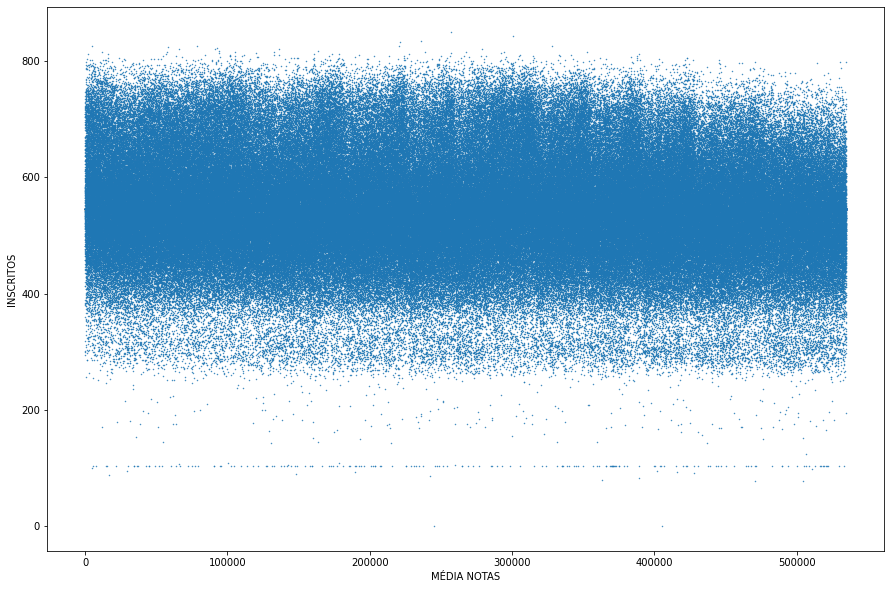

In [3]:
plt.figure(figsize=(15, 10))
plt.scatter(base.index, base['MEDIA_NOVA'], s=0.2)
plt.xlabel("MÉDIA NOTAS")
plt.ylabel("INSCRITOS")
plt.show()

Remoção de valores nulos e outliers:

In [4]:
base.fillna(base.mode().iloc[0], inplace=True)

In [5]:
base =  drop_outlier(base, 'MEDIA_NOVA')

Visualização dos dados tratados

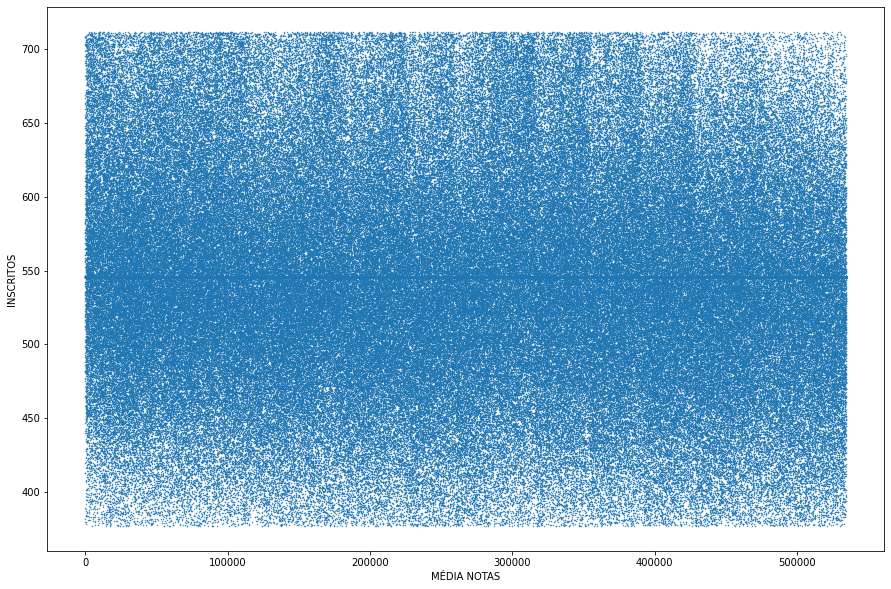

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(base.index, base['MEDIA_NOVA'], s=0.2)
plt.xlabel("MÉDIA NOTAS")
plt.ylabel("INSCRITOS")
plt.show()

# Separação por grupos

In [7]:
notas = np.where((base['MEDIA_NOVA']<=500), 1,               # PRIMEIRO GRUPO: Notas MENORES ou iguais a 500 pnts
                 np.where(base['MEDIA_NOVA']<=600, 2, 3      # SEGUNDO GRUPO: Notas MAIORES a 500 pnts e MENORES ou iguais a 600 pnts
                 )                                           # TERCEIRO GRUPO: Notas MAIORES que 600 pnts
                 )

base['GRUPO_NOTAS'] = notas   # Criando a coluna 'MEDIA_NOTAS'


# GRUPO 1

# MEDIA_NOVA <= 500

In [8]:
best_1 = base[base['GRUPO_NOTAS']==1]
best_1[best_corr(best_1, 'MEDIA_NOVA', 5, 6)].corr()['MEDIA_NOVA']

MEDIA_NOVA           1.000000
Q025_B               0.055297
Q024_B               0.051225
Q003_D               0.041863
TP_ANO_CONCLUIU      0.041677
Q016_B               0.037478
Q006_B              -0.050218
Q003_A              -0.051845
Q025_A              -0.055297
Q024_A              -0.062408
TP_STATUS_REDACAO   -0.137706
Name: MEDIA_NOVA, dtype: float64

1) 'QO25' - Na sua residência tem acesso à Internet?

A -> Sim. (*)

B -> Não



2) 'Q024' - Na sua residência tem computador?

A -> Sim. (*)

B -> Não.


3) 'Q003' - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

A -> Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista. (*)

D -> Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.

5) 'QO16' - Na sua residência tem forno micro-ondas?

B -> Sim.


7) 'Q006' - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

B -> Até R$ 998,00.

(*) CORRELAÇÃO NEGATIVA



Observações:

i) As questoões 3, 24 e 25 apareceram mais de uma vez (cada vez com uma resposta diferente)

ii) Renda de até 998 reais

Computador e internet são itens que tem influencia direta nas opções de estudo.


# Grupo 2

# 500 <= MEDIA_NOVA <= 600

In [9]:
best_2 = base[base['GRUPO_NOTAS']==2]
best_2[best_corr(best_2, 'MEDIA_NOVA', 5, 6)].corr()['MEDIA_NOVA']

MEDIA_NOVA    1.000000
Q003_D        0.081465
Q004_D        0.080730
Q018_B        0.073134
Q024_C        0.068619
Q014_B        0.067417
Q018_A       -0.073134
Q006_B       -0.073492
TP_LINGUA    -0.074284
Q008_B       -0.093135
Q024_A       -0.098085
Name: MEDIA_NOVA, dtype: float64


1) 'Q003' - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

D -> Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.

2) 'Q004' - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).

D -> Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.


3) 'QO18' - Na sua residência tem aspirador de pó?

A -> Não.(*)
B -> Sim.



4) 'Q024' - Na sua residência tem computador?

A -> Sim. (*)
C -> Sim, dois.


5) 'QO14' - Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)

B -> Sim, uma.



6) 'Q008' - Na sua residência tem banheiro?

B -> Sim, um.


7) 'Q006' - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

B -> Até R$ 998,00. (*)





Observações:

i) Q018 E Q024 aparecem 2 vezes (com duas respostas diferentes)

ii) Q006B apareceu com correlação negativa (inversamente proporcional)


# Grupo 3

# MEDIA_NOVA => 500

In [10]:
best_3 = base[base['GRUPO_NOTAS']==3]
best_3[best_corr(best_3, 'MEDIA_NOVA', 5, 6)].corr()['MEDIA_NOVA']

MEDIA_NOVA    1.000000
Q003_E        0.112547
Q002_G        0.101051
Q001_G        0.099955
Q018_B        0.099396
Q004_D        0.098105
Q014_A       -0.100883
Q024_A       -0.103045
Q010_A       -0.108299
Q007_A       -0.118059
Q008_B       -0.147324
Name: MEDIA_NOVA, dtype: float64

1) 'Q003' - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).

E -> Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.


2) 'Q002' Até que série sua mãe, ou a mulher responsável por você, estudou?

G -> Completou a Pós-graduação.

3) 'Q001' - Até que série seu pai, ou o homem responsável por você, estudou?

G -> Completou a Pós-graduação.

4) 'Q018' - Na sua residência tem aspirador de pó?

B -> Sim.

5) 'Q004' - A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).

B -> Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.



6) 'Q008' - Na sua residência tem banheiro?

B -> Sim, um.(*)

7) 'Q007' - Em sua residência trabalha empregado(a) doméstico(a)?

A - Não. 

8) 'Q010' - Na sua residência tem carro?

A - Não. 

9) 'Q024' - Na sua residência tem computador?

A - Não.


10) 'Q014' - Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)

B -> Não.

Observações:

i) Nenhuma questão repetida
 
ii) 4 dos itens com influencia negativa se tratam ao fato de não ter algum serviço/item (emprega doméstica, carro, computador, maquina de lavar roupa). O outro item diz respeito a um item onde é possivel se ter mais de 1 em uma casa.
 
iii) As questões Q001, Q002, Q003 apresentam que os pais dos candidatos apresentem uma pós graduação, assim como ocupações conhecidas por serem mais "nobres"


In [11]:
lista_best_columns = best_corr(best_1, 'MEDIA_NOVA', 5, 6) + best_corr(best_2, 'MEDIA_NOVA', 5, 6) + best_corr(best_3, 'MEDIA_NOVA', 5, 6)
pd.DataFrame(lista_best_columns).value_counts()

MEDIA_NOVA           3
Q024_A               3
Q003_D               2
Q004_D               2
Q006_B               2
Q008_B               2
Q018_B               2
Q018_A               1
TP_LINGUA            1
TP_ANO_CONCLUIU      1
Q025_B               1
Q025_A               1
Q024_C               1
Q024_B               1
Q014_B               1
Q016_B               1
Q001_G               1
Q014_A               1
Q010_A               1
Q007_A               1
Q003_E               1
Q003_A               1
Q002_G               1
TP_STATUS_REDACAO    1
dtype: int64

Questões mais relevantes
 
  i) 23 colunas diferentes foram analisadas, sendo delas 16 questoes(13 do questionário), dessa forma podemos notas que o questionário teve uma importância maior do que o resto das perguntas;

 ii) Q024 apareceu 5 vezes com 3 respostas diferentes;
 
iii) Q003 e Q024 apareceram em todos grupos;
 
# Conclusões finais
É possivel notar que as maiores notas estão presentes entre as famílias com mais bens, situação econômica melhor e maior grau de estudo. Itens como computador e internet se destacam, por serem diretamente ligados a opções de estudo e aprimoramento.




# MODELOS 

Vou propor dois modelos diferentes, um baseado apenas nos grupo, e outro baseado nas média. Em ambos os será usado as colunas 'lista_best_columns'.

MODELO BASEADO NOS GRUPOS

In [12]:
X = base[lista_best_columns].drop(columns=['MEDIA_NOVA'])
y = base['GRUPO_NOTAS']
z = base['MEDIA_NOVA']

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state=1)

In [14]:
%%time
rf_model = RandomForestRegressor(random_state=81)
rf_model.fit(train_X, train_y)

CPU times: total: 2min 58s
Wall time: 3min 58s


RandomForestRegressor(random_state=81)

In [15]:
rf_val_predictions = rf_model.predict(test_X)
rf_val_mae =  mean_absolute_error(test_y, rf_val_predictions)
rf_val_mae

0.48261707783234953

MODELO BASEADO NAS MEDIAS 

In [16]:
train_X, test_X, train_z, test_z = train_test_split(X, z, test_size = 0.25, random_state=1)

In [17]:
%%time
rfm_model = RandomForestRegressor(random_state=81)
rfm_model.fit(train_X, train_z)

CPU times: total: 2min 21s
Wall time: 3min 3s


RandomForestRegressor(random_state=81)

In [18]:
rfm_val_predictions = rfm_model.predict(test_X)
rfm_val_mae =  mean_absolute_error(test_z, rfm_val_predictions)
rfm_val_mae

49.19034391402727